In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer



In [9]:

# Load the dataset
df = pd.read_csv('joined_df_cleaned.csv')

# Identify categorical columns
categorical_cols = ['Jurisdiction']

# Create dummy variables for categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features for math and reading
features_math = ['ELL_x', 'White_x', 'Black_x', 'Hispanic_x', 'Low SES_x', 'Male_x', 'Female_x', 'ESE_x']
features_reading = ['ELL_y', 'White_y', 'Black_y', 'Hispanic_y', 'Low SES_y', 'Male_y', 'Female_y', 'ESE_y']

# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
df[features_math + features_reading] = imputer.fit_transform(df[features_math + features_reading])

# Standardize the data
scaler = StandardScaler()
df[features_math + features_reading] = scaler.fit_transform(df[features_math + features_reading])


In [11]:

# K-means Clustering for Math Scores
kmeans_math = KMeans(n_clusters=3, random_state=42)
df['kmeans_math_labels'] = kmeans_math.fit_predict(df[features_math])
silhouette_math = silhouette_score(df[features_math], df['kmeans_math_labels'])


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:

# Hierarchical Clustering for Math Scores
Z_math = linkage(df[features_math], method='ward')
df['hierarchical_math_labels'] = fcluster(Z_math, 3, criterion='maxclust')


In [15]:

# PCA for Math Scores
pca_math = PCA(n_components=2)
math_pca = pca_math.fit_transform(df[features_math])


In [31]:

# t-SNE for Math Scores
tsne_math = TSNE(n_components=2, random_state=42)
math_tsne = tsne_math.fit_transform(df[features_math])


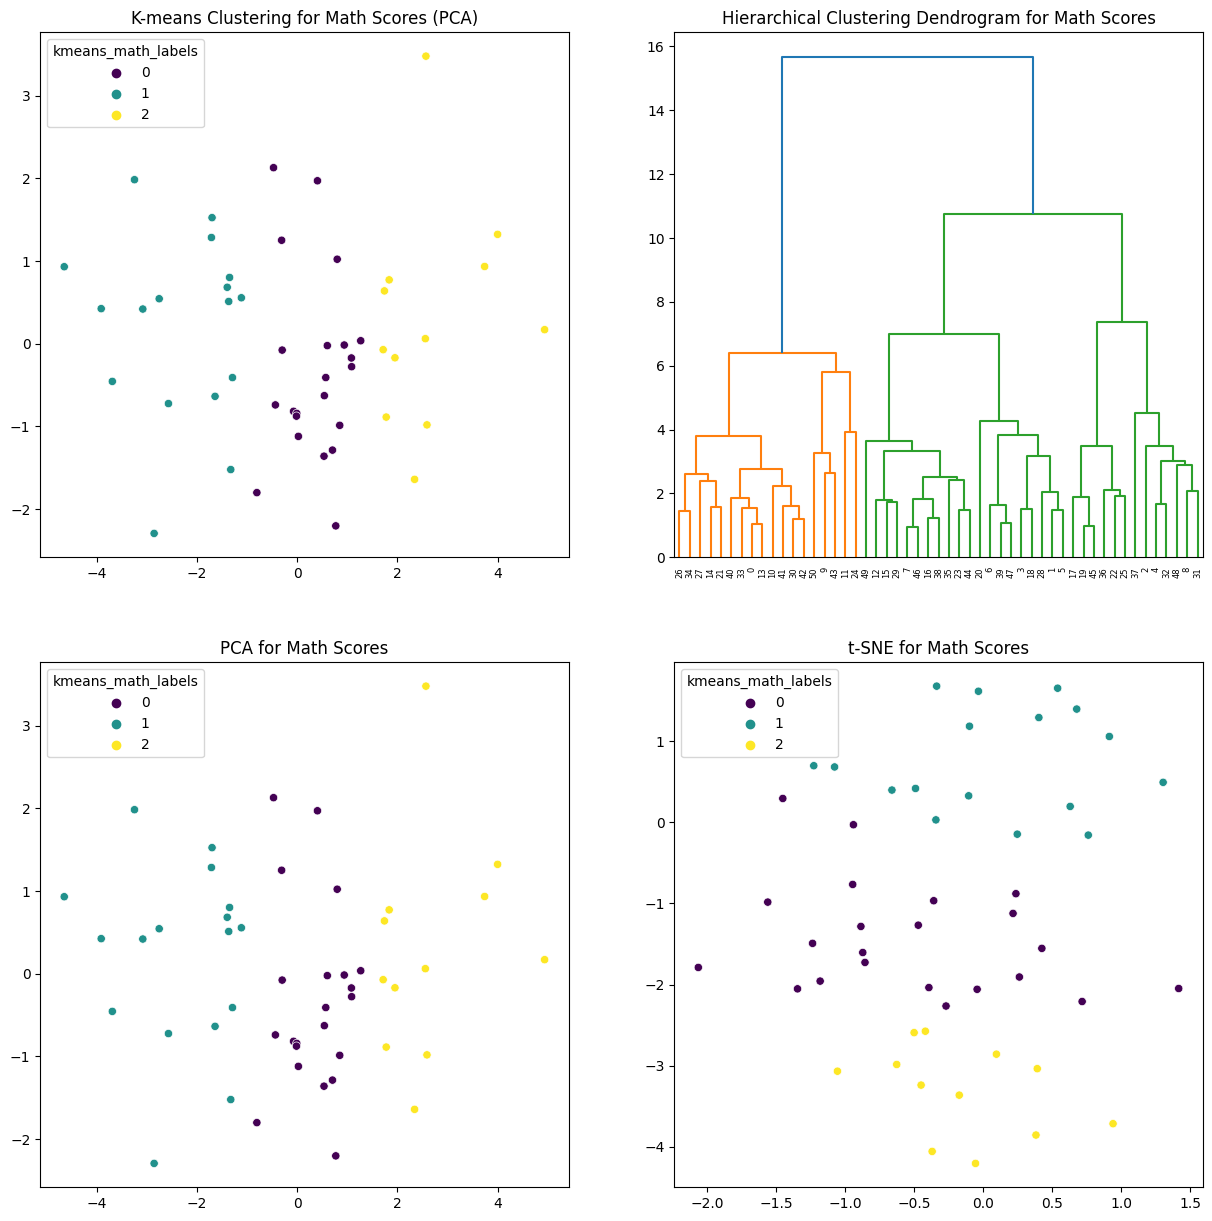

In [33]:

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# K-means Clustering Visualization
sns.scatterplot(x=math_pca[:, 0], y=math_pca[:, 1], hue=df['kmeans_math_labels'], palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('K-means Clustering for Math Scores (PCA)')

# Hierarchical Clustering Dendrogram
dendrogram(Z_math, ax=axes[0, 1])
axes[0, 1].set_title('Hierarchical Clustering Dendrogram for Math Scores')

# PCA Visualization
sns.scatterplot(x=math_pca[:, 0], y=math_pca[:, 1], hue=df['kmeans_math_labels'], palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('PCA for Math Scores')

# t-SNE Visualization
sns.scatterplot(x=math_tsne[:, 0], y=math_tsne[:, 1], hue=df['kmeans_math_labels'], palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('t-SNE for Math Scores')

plt.show()


In [35]:
# Repeat the same for Reading Scores

# K-means Clustering for Reading Scores
kmeans_reading = KMeans(n_clusters=3, random_state=42)
df['kmeans_reading_labels'] = kmeans_reading.fit_predict(df[features_reading])
silhouette_reading = silhouette_score(df[features_reading], df['kmeans_reading_labels'])

# Hierarchical Clustering for Reading Scores
Z_reading = linkage(df[features_reading], method='ward')
df['hierarchical_reading_labels'] = fcluster(Z_reading, 3, criterion='maxclust')

# PCA for Reading Scores
pca_reading = PCA(n_components=2)
reading_pca = pca_reading.fit_transform(df[features_reading])

# t-SNE for Reading Scores
tsne_reading = TSNE(n_components=2, random_state=42)
reading_tsne = tsne_reading.fit_transform(df[features_reading])


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


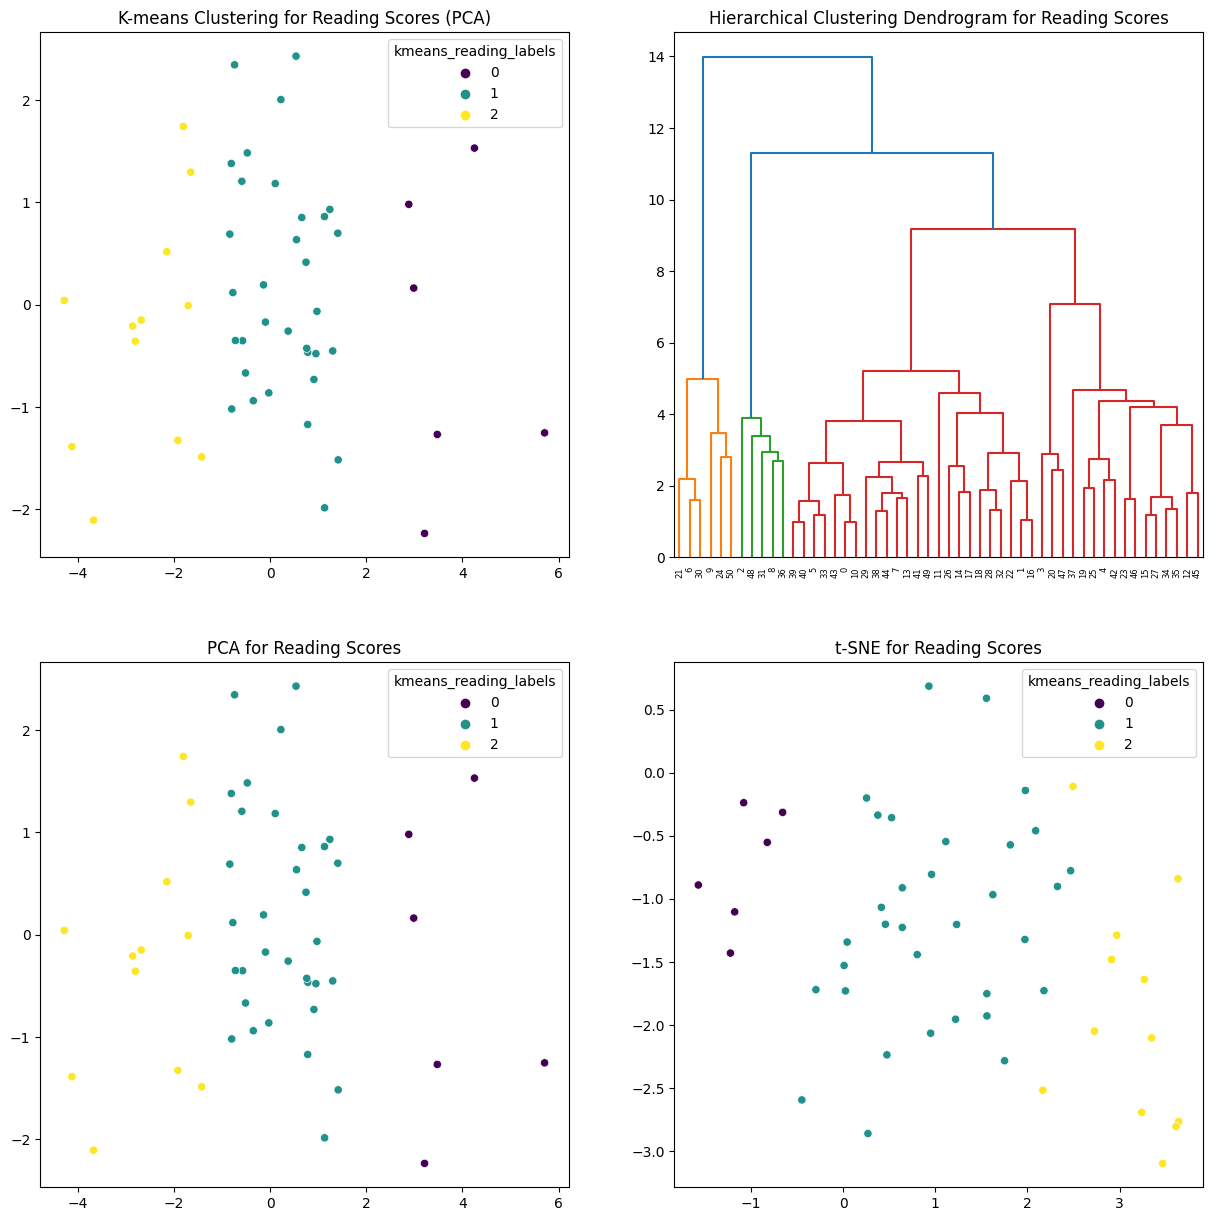

K-means Silhouette Score for Math: 0.19511601056254912
K-means Silhouette Score for Reading: 0.24031130536184014


In [37]:

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# K-means Clustering Visualization
sns.scatterplot(x=reading_pca[:, 0], y=reading_pca[:, 1], hue=df['kmeans_reading_labels'], palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('K-means Clustering for Reading Scores (PCA)')

# Hierarchical Clustering Dendrogram
dendrogram(Z_reading, ax=axes[0, 1])
axes[0, 1].set_title('Hierarchical Clustering Dendrogram for Reading Scores')

# PCA Visualization
sns.scatterplot(x=reading_pca[:, 0], y=reading_pca[:, 1], hue=df['kmeans_reading_labels'], palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('PCA for Reading Scores')

# t-SNE Visualization
sns.scatterplot(x=reading_tsne[:, 0], y=reading_tsne[:, 1], hue=df['kmeans_reading_labels'], palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('t-SNE for Reading Scores')

plt.show()

# Summary of Findings
print(f"K-means Silhouette Score for Math: {silhouette_math}")
print(f"K-means Silhouette Score for Reading: {silhouette_reading}")

In [19]:
# Experiment with different numbers of clusters
range_n_clusters = [2, 3, 4, 5, 6]

# For Math Scores
for n_clusters in range_n_clusters:
    kmeans_math = KMeans(n_clusters=n_clusters, random_state=42)
    labels_math = kmeans_math.fit_predict(df[features_math])
    silhouette_avg_math = silhouette_score(df[features_math], labels_math)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score for Math is: {silhouette_avg_math}")

# For Reading Scores
for n_clusters in range_n_clusters:
    kmeans_reading = KMeans(n_clusters=n_clusters, random_state=42)
    labels_reading = kmeans_reading.fit_predict(df[features_reading])
    silhouette_avg_reading = silhouette_score(df[features_reading], labels_reading)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score for Reading is: {silhouette_avg_reading}")


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

For n_clusters = 2, the average silhouette_score for Math is: 0.27584082846084107
For n_clusters = 3, the average silhouette_score for Math is: 0.19511601056254912
For n_clusters = 4, the average silhouette_score for Math is: 0.1942417850187038
For n_clusters = 5, the average silhouette_score for Math is: 0.2084845956822788
For n_clusters = 6, the average silhouette_score for Math is: 0.1801683342031151
For n_clusters = 2, the average silhouette_score for Reading is: 0.21379714216269988
For n_clusters = 3, the average silhouette_score for Reading is: 0.24031130536184014
For n_clusters = 4, the average silhouette_score for Reading is: 0.2065496374664597
For n_clusters = 5, the average silhouette_score for Reading is: 0.2123568925100326
For n_clusters = 6, the average silhouette_score for Reading is: 0.15182272781083772


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


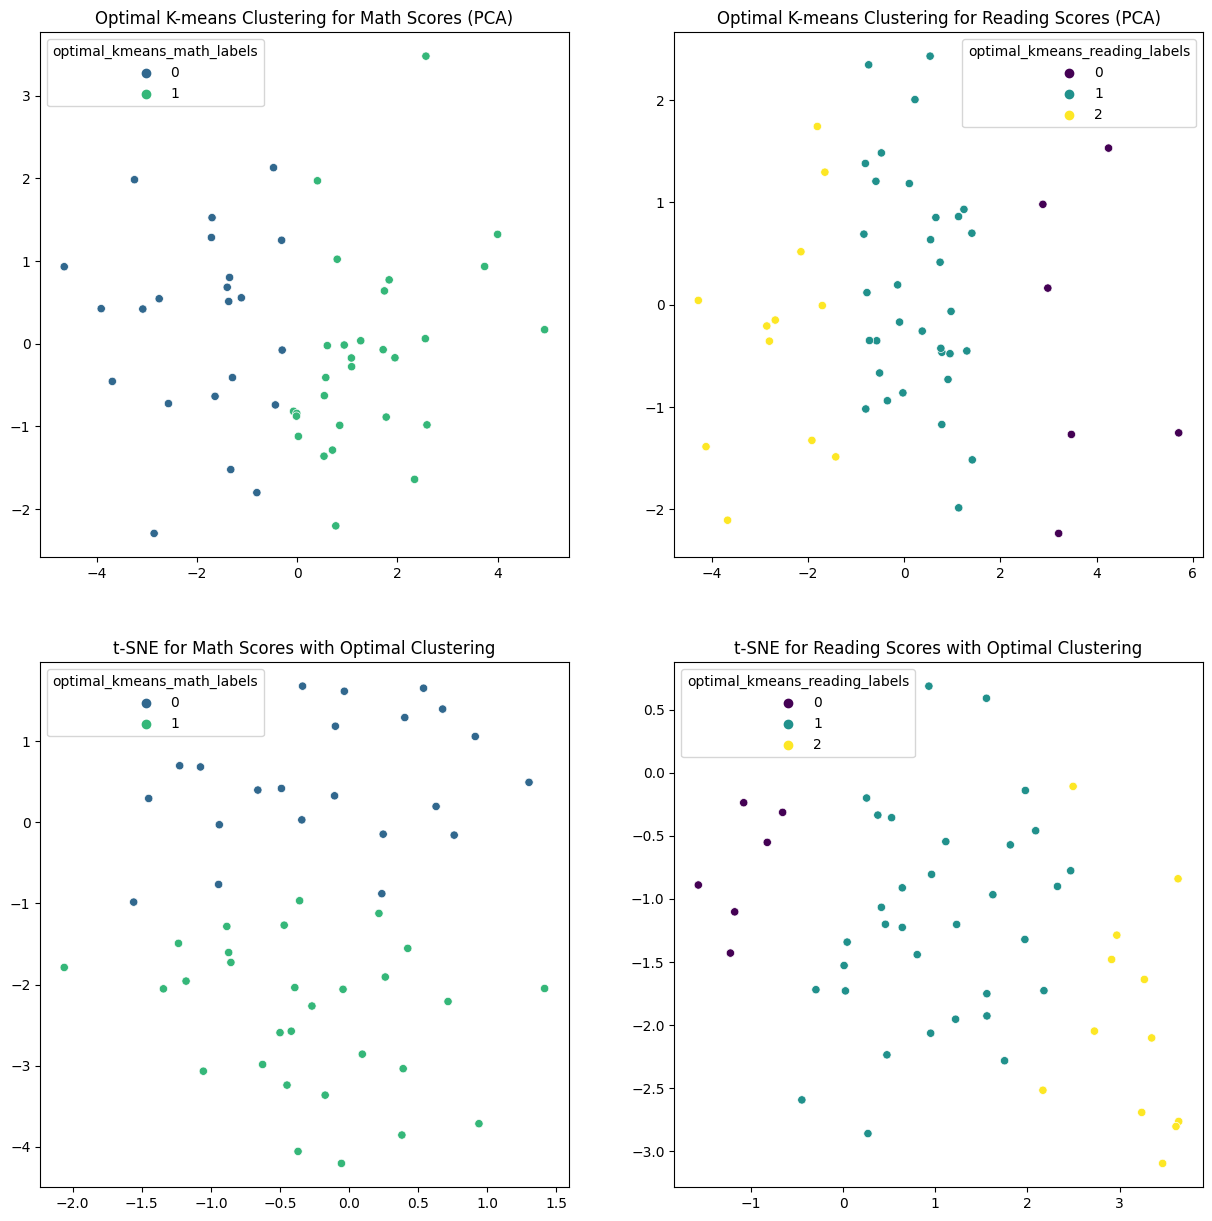

Optimal K-means Silhouette Score for Math: 0.27584082846084107
Optimal K-means Silhouette Score for Reading: 0.24031130536184014


In [21]:
# Optimal clustering for Math Scores
optimal_kmeans_math = KMeans(n_clusters=2, random_state=42)
df['optimal_kmeans_math_labels'] = optimal_kmeans_math.fit_predict(df[features_math])
optimal_silhouette_math = silhouette_score(df[features_math], df['optimal_kmeans_math_labels'])

# Optimal clustering for Reading Scores
optimal_kmeans_reading = KMeans(n_clusters=3, random_state=42)
df['optimal_kmeans_reading_labels'] = optimal_kmeans_reading.fit_predict(df[features_reading])
optimal_silhouette_reading = silhouette_score(df[features_reading], df['optimal_kmeans_reading_labels'])

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Optimal K-means Clustering Visualization for Math Scores
sns.scatterplot(x=math_pca[:, 0], y=math_pca[:, 1], hue=df['optimal_kmeans_math_labels'], palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Optimal K-means Clustering for Math Scores (PCA)')

# Optimal K-means Clustering Visualization for Reading Scores
sns.scatterplot(x=reading_pca[:, 0], y=reading_pca[:, 1], hue=df['optimal_kmeans_reading_labels'], palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Optimal K-means Clustering for Reading Scores (PCA)')

# t-SNE for Math Scores with Optimal Clustering
sns.scatterplot(x=math_tsne[:, 0], y=math_tsne[:, 1], hue=df['optimal_kmeans_math_labels'], palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('t-SNE for Math Scores with Optimal Clustering')

# t-SNE for Reading Scores with Optimal Clustering
sns.scatterplot(x=reading_tsne[:, 0], y=reading_tsne[:, 1], hue=df['optimal_kmeans_reading_labels'], palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('t-SNE for Reading Scores with Optimal Clustering')

plt.show()

# Summary of Optimal Findings
print(f"Optimal K-means Silhouette Score for Math: {optimal_silhouette_math}")
print(f"Optimal K-means Silhouette Score for Reading: {optimal_silhouette_reading}")


In [25]:
# For Math Scores
cluster_summary_math = df.groupby('optimal_kmeans_math_labels')[features_math].mean()
print("Math Scores Cluster Summary:")
print(cluster_summary_math)

# For Reading Scores
cluster_summary_reading = df.groupby('optimal_kmeans_reading_labels')[features_reading].mean()
print("\nReading Scores Cluster Summary:")
print(cluster_summary_reading)


Math Scores Cluster Summary:
                               ELL_x   White_x   Black_x  Hispanic_x  \
optimal_kmeans_math_labels                                             
0                          -0.407897 -0.757483 -0.526153   -0.452691   
1                           0.309439  0.574642  0.399150    0.343421   

                            Low SES_x    Male_x  Female_x     ESE_x  
optimal_kmeans_math_labels                                           
0                           -0.594266 -0.865016 -0.905005 -0.734362  
1                            0.450823  0.656219  0.686556  0.557102  

Reading Scores Cluster Summary:
                                  ELL_y   White_y   Black_y  Hispanic_y  \
optimal_kmeans_reading_labels                                             
0                              0.913051  1.287188  1.293828    1.233682   
1                             -0.016757  0.205293  0.019247   -0.068956   
2                             -0.410445 -1.208150 -0.699843   -0.4272

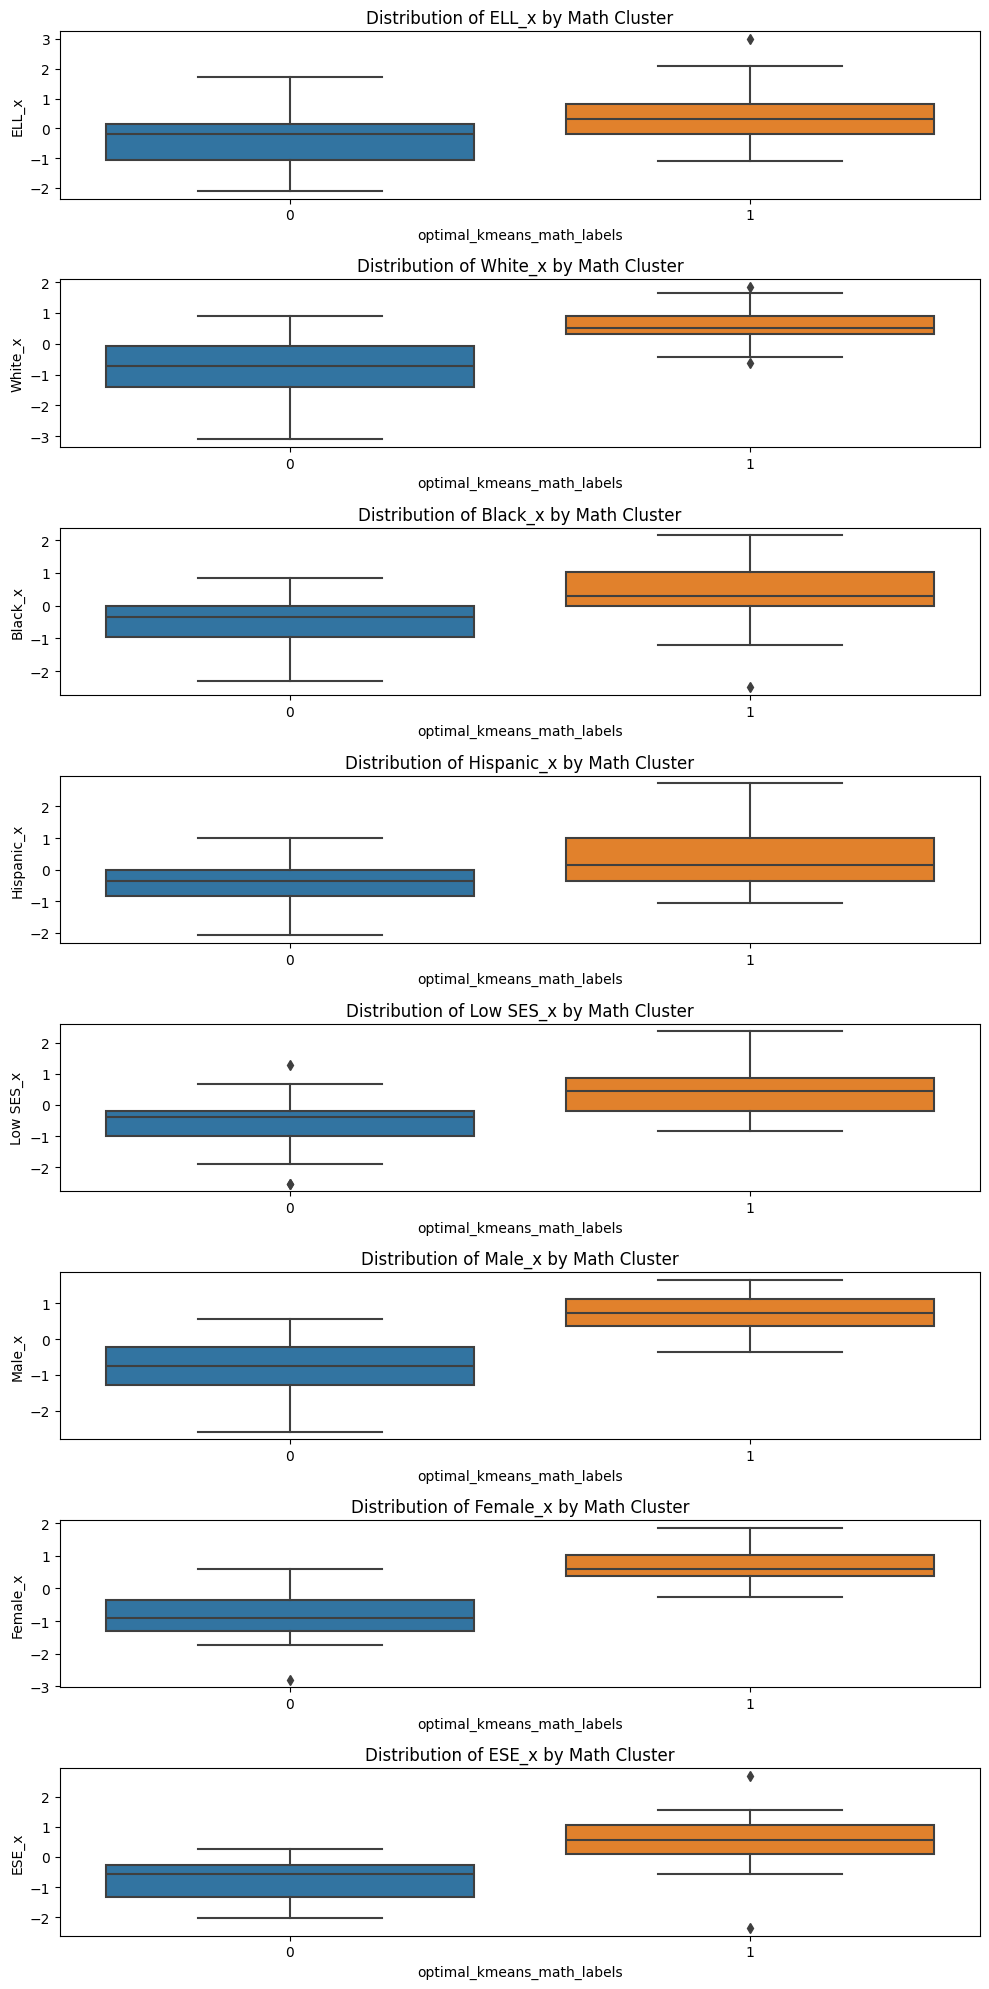

In [41]:
# Visualizing feature distributions for Math Scores
fig, axes = plt.subplots(len(features_math), 1, figsize=(10, 20))
for i, feature in enumerate(features_math):
    sns.boxplot(x=df['optimal_kmeans_math_labels'], y=df[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Math Cluster')
plt.tight_layout()
plt.show()



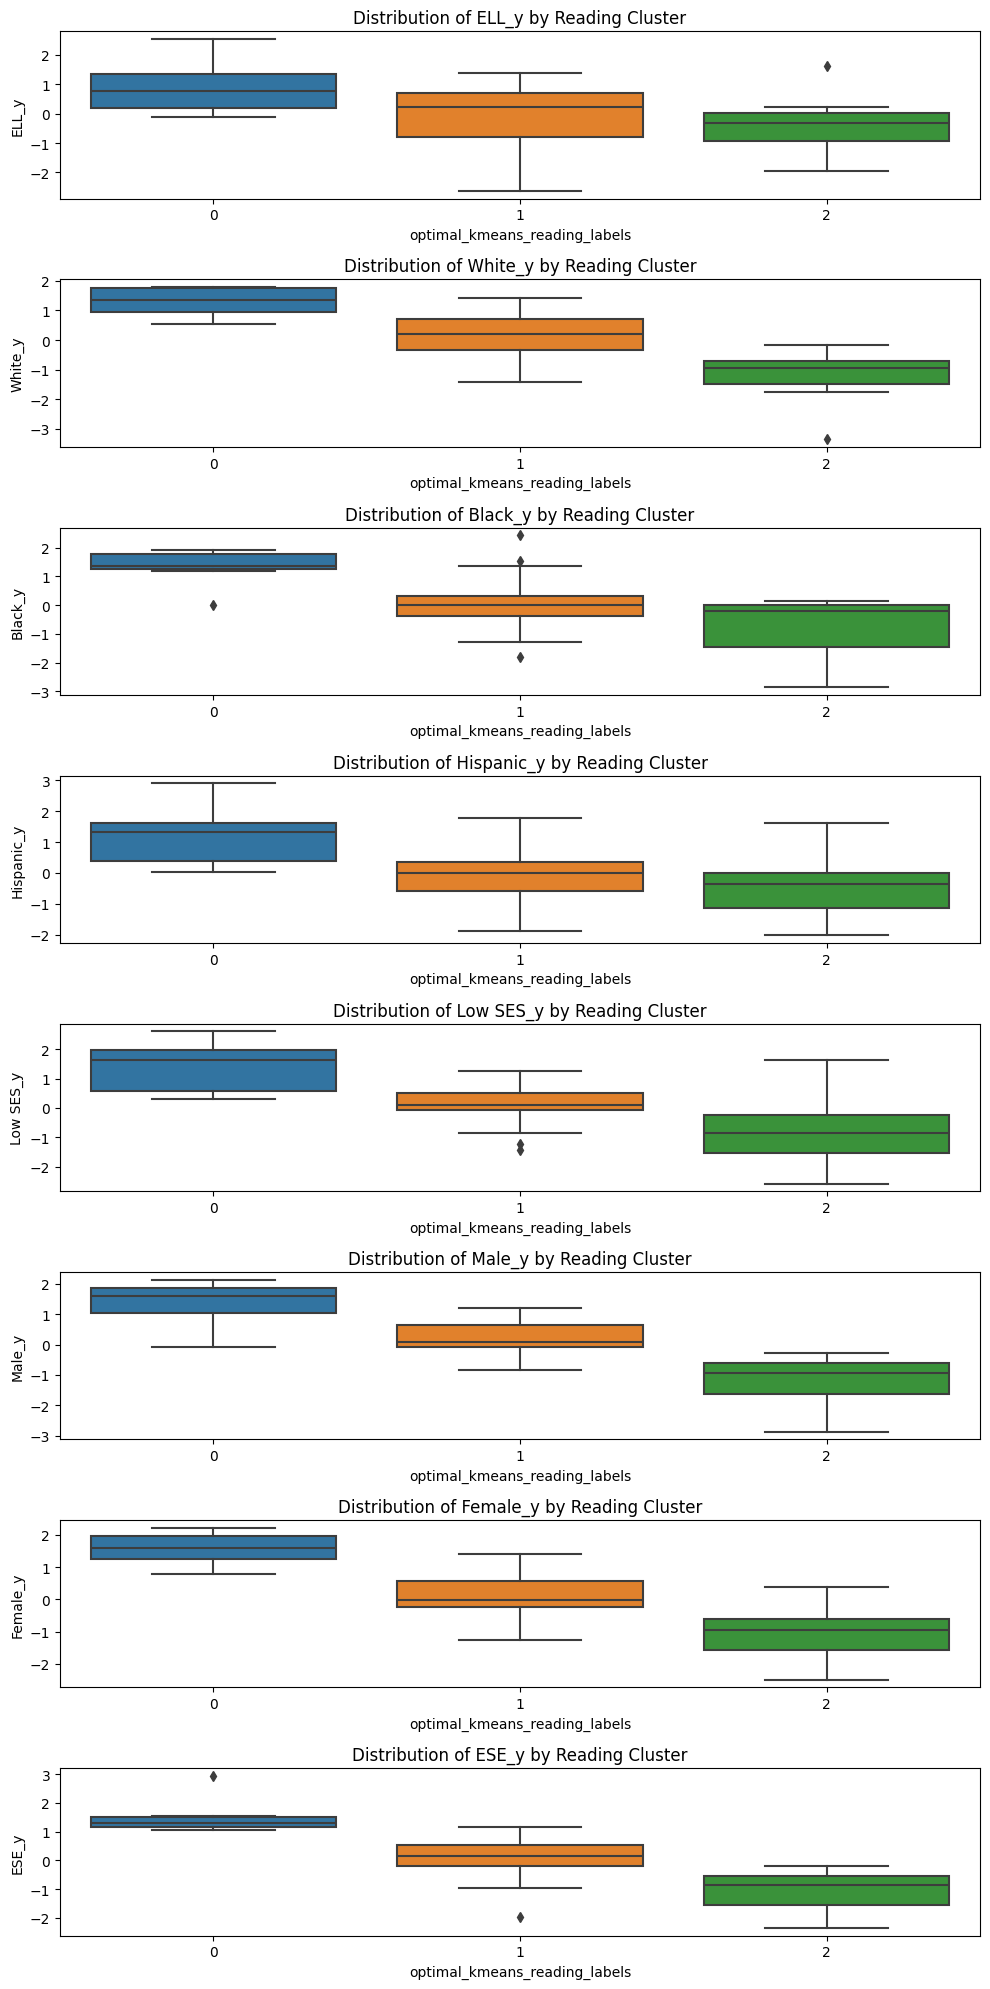

In [43]:
# Visualizing feature distributions for Reading Scores
fig, axes = plt.subplots(len(features_reading), 1, figsize=(10, 20))
for i, feature in enumerate(features_reading):
    sns.boxplot(x=df['optimal_kmeans_reading_labels'], y=df[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Reading Cluster')
plt.tight_layout()
plt.show()


In [45]:
# Inspecting data points in each Math cluster
for cluster in df['optimal_kmeans_math_labels'].unique():
    print(f"\nCluster {cluster} in Math Scores:")
    print(df[df['optimal_kmeans_math_labels'] == cluster].head())




Cluster 1 in Math Scores:
    Average Math Score     ELL_x   White_x   Black_x  Hispanic_x  Low SES_x  \
0                236.0  0.448143  0.509269  0.479012    0.153879   0.237934   
6                236.0 -0.445427  0.698851  1.781182   -0.704982  -0.400731   
7                236.0 -0.317774  0.888433 -0.637133   -0.704982  -0.613620   
9                241.0  0.448143  1.836342  1.967206    2.215146   2.366818   
10               235.0  0.958755  0.509269  1.409133    1.012741   0.663711   

      Male_x  Female_x     ESE_x  Average Reading Score  ...  Low SES_y  \
0   0.369522  0.166577  0.411312                    217  ...   0.300629   
6   0.369522  0.166577  0.248700                    223  ...   0.300629   
7   0.000000  0.803734  0.086089                    219  ...  -0.082673   
9   1.293325  1.228506  2.687878                    225  ...   2.600438   
10 -0.184761  0.378963  1.061759                    216  ...   0.492279   

      Male_y  Female_y     ESE_y  kmeans_math_l

In [47]:
# Inspecting data points in each Reading cluster
for cluster in df['optimal_kmeans_reading_labels'].unique():
    print(f"\nCluster {cluster} in Reading Scores:")
    print(df[df['optimal_kmeans_reading_labels'] == cluster].head())



Cluster 1 in Reading Scores:
   Average Math Score     ELL_x   White_x   Black_x  Hispanic_x  Low SES_x  \
0               236.0  0.448143  0.509269  0.479012    0.153879   0.237934   
1               230.0  0.448143 -0.628222 -0.265085   -0.189665  -0.826508   
3               232.0 -1.977262  0.698851  0.106964   -0.361437  -0.826508   
5               230.0 -0.190121  0.319687  0.106964   -0.704982  -0.826508   
7               236.0 -0.317774  0.888433 -0.637133   -0.704982  -0.613620   

     Male_x  Female_x     ESE_x  Average Reading Score  ...  Low SES_y  \
0  0.369522  0.166577  0.411312                    217  ...   0.300629   
1 -0.739043 -0.895352  0.248700                    213  ...  -0.082673   
3 -0.369522 -0.682966 -0.564359                    215  ...  -0.082673   
5 -0.554282 -1.107737 -0.401747                    214  ...  -0.082673   
7  0.000000  0.803734  0.086089                    219  ...  -0.082673   

     Male_y  Female_y     ESE_y  kmeans_math_labels  hie

### Key Findings

1. **Optimal Number of Clusters**:
   - For **Math Scores**, the optimal number of clusters is **2**, with the highest silhouette score of **0.2758**.
   - For **Reading Scores**, the optimal number of clusters is **3**, with the highest silhouette score of **0.2403**.

2. **Cluster Characteristics for Math Scores**:
   - **Cluster 0**: Contains students with lower values in socio-demographic features such as ELL status, race/ethnicity, SES, and gender. These students also have a lower average math score.
   - **Cluster 1**: Includes students with higher values in these features, reflecting a generally higher socio-economic status and better performance in math scores.

3. **Cluster Characteristics for Reading Scores**:
   - **Cluster 0**: Represents students with higher values across socio-demographic features, including ELL status, race/ethnicity, and SES, along with a higher average math score.
   - **Cluster 1**: Shows mixed socio-demographic characteristics, with an average math score similar to Cluster 0.
   - **Cluster 2**: Includes students with the lowest values in socio-demographic features and the lowest average math score.

4. **Performance Trends**:
   - In both math and reading, higher socio-economic status and better demographic characteristics are associated with higher average scores.
   - The clusters with higher average math and reading scores correspond to higher values in socio-demographic features, while those with lower scores are associated with lower values.

5. **Insights for Targeted Interventions**:
   - **Cluster 0** (for both Math and Reading) may benefit from targeted interventions to improve performance, given its lower average scores and socio-demographic challenges.
   - **Cluster 1** and **Cluster 2** (Reading) have higher average scores but might still need support in maintaining performance and addressing specific challenges.

These findings suggest that socio-demographic factors have a significant impact on student performance, and interventions may need to be tailored according to the characteristics of each cluster to effectively support all students.